In [27]:
using Statistics, LinearAlgebra, Random, DataFrames, Plots, StatsPlots, CSV, Dates

In [3]:
credits = CSV.read("credits.csv")
keywords = CSV.read("keywords.csv")
links = CSV.read("links.csv")
links_small = CSV.read("links_small.csv")
movies_metadata = CSV.read("movies_metadata.csv")
ratings = CSV.read("ratings.csv")
ratings_small = CSV.read("ratings_small.csv");

thread = 1 warning: only found 10 / 24 columns on data row: 19730. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 19731. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 29503. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 29504. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 35587. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 35588. Filling remaining columns with `missing`


In [13]:
# preprocess all the missing data, and change missing to mean value
time = movies_metadata[:, :runtime]
valid = filter(x -> ! ismissing(x), time)
mean_val = mean(valid)
for i in 1:size(time, 1)
    if ismissing(time[i]) || time[i] == 0
        time[i] = mean_val
    end
end

In [14]:
min_val = minimum(time)
max_val = maximum(time)
q_val = quantile(time, [0.25, 0.5, 0.75])

3-element Array{Float64,1}:
  87.0
  95.0
 107.0

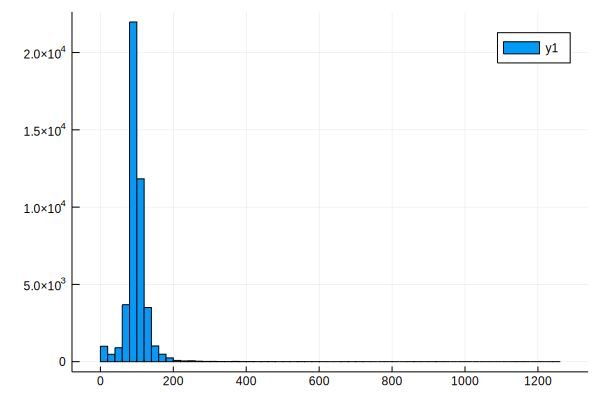

In [60]:
histogram(time, bins=:rice)

In [22]:
runtime = zeros(size(time, 1), 3) # the new matrix with many code
for i in 1:size(time, 1)
    t = time[i]
    runtime[i, :] = Int.([t>=q_val[1], t>=q_val[2], t>=q_val[3]])
end
runtime

45466×3 Array{Float64,2}:
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 1.0  1.0  1.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0

In [44]:
date = movies_metadata[:, :release_date]
months = Int.(zeros(size(date, 1)))
for i in 1:size(date, 1)
    x = date[i]
    if ismissing(x)
        months[i] = rand(1:12,1)[1]
    else
        months[i] = Dates.month(x)
    end
end

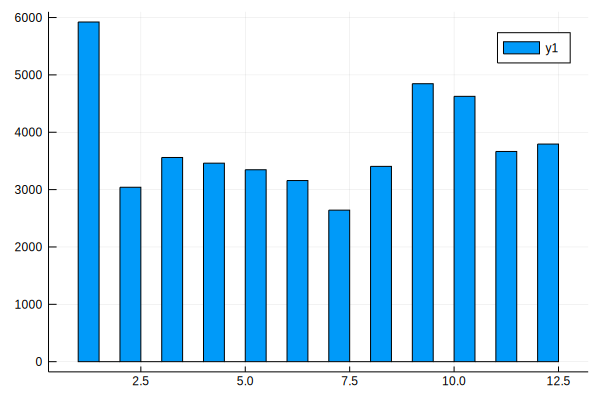

In [62]:
histogram(months)

In [46]:
release_date = zeros(size(months, 1), 4)
for i in 1:length(months)
    d = months[i]
    release_date[i, :] = Int.([d in 1:3, d in 4:6, d in 7:9, d in 10:12])
end
release_date

45466×4 Array{Float64,2}:
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 ⋮                 
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0